C:\Users\Darcy Hou\AppData\Local\Temp\ipykernel_33208\2759051526.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Duration'].fillna(df['Sleep Duration'].median(), inplace=True)


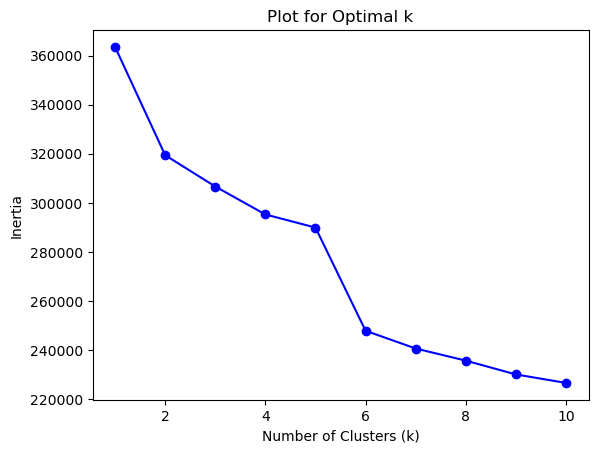

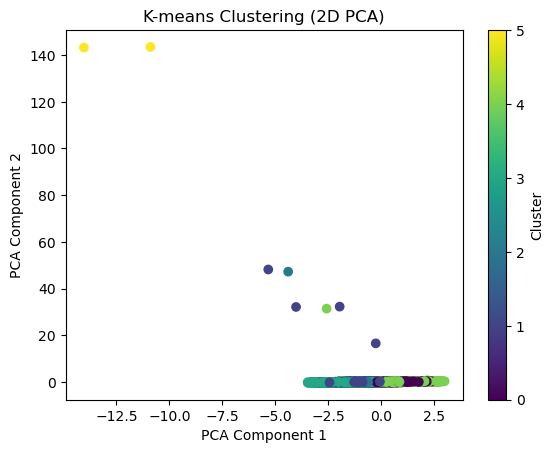

               Age  Academic Pressure  Work Pressure      CGPA  \
Cluster                                                          
0        24.595337           3.767936        0.00000  7.687730   
1        27.464475           2.381495        0.00053  6.226723   
2        27.683905           2.192348        0.00000  8.944388   
3        26.709427           2.335768        0.00000  7.673584   
4        24.875172           3.767570        0.00000  7.681200   
5        28.000000           0.000000        5.00000  0.000000   

         Study Satisfaction  Job Satisfaction  Sleep Duration  \
Cluster                                                         
0                  2.702401          0.000000        8.141142   
1                  3.478261          0.001591        6.790960   
2                  3.022955          0.000792        6.444063   
3                  3.252682          0.000000        6.698927   
4                  2.724162          0.000230        4.890331   
5               

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



df=pd.read_csv('Student Depression Dataset.csv')

#change sleep format
def convert_sleep_duration(sleep):
    if sleep == 'Less than 5 hours':
        return 4.5
    elif sleep == '5-6 hours':
        return 5.5
    elif sleep == '7-8 hours':
        return 7.5
    elif sleep == 'More than 8 hours':
        return 9.0
    else:
        return np.nan

df['Sleep Duration'] = df['Sleep Duration'].apply(convert_sleep_duration)
df['Sleep Duration'].fillna(df['Sleep Duration'].median(), inplace=True)
df = df.drop(columns=['id'])

categorical_cols = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Depression']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.fillna(df_encoded.median(), inplace=True)


#optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

#Elbow Curve
plt.figure()
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Plot for Optimal k')
plt.show()

#K-means clustering at elboww point
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_encoded)
df['Cluster'] = kmeans.labels_

pca = PCA(n_components=2) #plot
df_pca = pca.fit_transform(df_encoded)
plt.figure()
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'])
plt.title('K-means Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

numerical_cols = df.select_dtypes(include=[np.number]).columns
cluster_analysis = df.groupby('Cluster')[numerical_cols].mean()
print(cluster_analysis)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Cluster analysis for {col}:")
    print(df.groupby('Cluster')[col].value_counts())

silhouette_avg = silhouette_score(df_encoded, df['Cluster'])#eval clusters by silouet score
print(silhouette_avg)